#  A.E.G.I.S. Performance Simulation
**Comparative Analysis: Sequential Chains vs. CPM Graph Orchestration**

This notebook simulates the performance impact of the **A.E.G.I.S.** orchestration engine using Monte Carlo methods. We compare a traditional sequential execution model against the A.E.G.I.S. parallel execution model based on the Critical Path Method (CPM).

**Scenario:** "RFP Response Generation" (Request for Proposal)
* **Task A:** Document Parsing (Blocking)
* **Task B:** Market Research (Independent)
* **Task C:** Competitor Analysis (Independent)
* **Task D:** Internal Data Retrieval (Independent)
* **Task E:** Final Proposal Drafting (Dependent on all)

In [1]:
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configuration
ITERATIONS = 10000
random.seed(42)  # For reproducibility

print(f" Setup complete. Simulating {ITERATIONS} iterations.")

 Setup complete. Simulating 10000 iterations.


In [2]:
# Define Task Durations (Optimistic, Most Likely, Pessimistic)
# Values in seconds
tasks = {
    "A_Parse":      (2.0, 3.0, 5.0),
    "B_Research":   (3.0, 5.0, 9.0),
    "C_Competitors":(2.5, 4.0, 8.0),
    "D_InternalDB": (1.0, 2.0, 4.0),
    "E_Drafting":   (4.0, 6.0, 12.0)
}

def get_duration(task_name):
    O, M, P = tasks[task_name]
    return random.triangular(O, P, M)

def simulate_workflow():
    # 1. Generate randomized durations for this iteration
    t_a = get_duration("A_Parse")
    t_b = get_duration("B_Research")
    t_c = get_duration("C_Competitors")
    t_d = get_duration("D_InternalDB")
    t_e = get_duration("E_Drafting")
    
    # --- SCENARIO 1: LEGACY SEQUENTIAL CHAIN ---
    # A -> B -> C -> D -> E
    seq_time = t_a + t_b + t_c + t_d + t_e
    
    # --- SCENARIO 2: A.E.G.I.S. (CPM GRAPH) ---
    # A -> (B, C, D in Parallel) -> E
    # Wait for the slowest of the parallel tasks
    parallel_block = max(t_b, t_c, t_d)
    cpm_time = t_a + parallel_block + t_e
    
    return seq_time, cpm_time

print(" Simulation logic defined.")

 Simulation logic defined.


In [3]:
results_seq = []
results_cpm = []

for _ in range(ITERATIONS):
    s, c = simulate_workflow()
    results_seq.append(s)
    results_cpm.append(c)

# Convert to DataFrame for analysis
df = pd.DataFrame({
    'Sequential': results_seq,
    'AEGIS_CPM': results_cpm
})

# Calculate Improvement
df['Improvement'] = df['Sequential'] - df['AEGIS_CPM']
df['Pct_Improvement'] = (df['Improvement'] / df['Sequential']) * 100

print(" Simulation run successfully.")
print(df.head())

 Simulation run successfully.
   Sequential  AEGIS_CPM  Improvement  Pct_Improvement
0   21.345026  15.978875     5.366151        25.140053
1   21.173598  15.689077     5.484521        25.902640
2   21.005161  16.264928     4.740233        22.566993
3   20.221189  12.664062     7.557127        37.372317
4   26.669095  20.795921     5.873175        22.022399


In [4]:
def print_stats(name, data):
    p50 = statistics.median(data)
    p80 = statistics.quantiles(data, n=100)[79]
    p99 = statistics.quantiles(data, n=100)[98]
    print(f"--- {name} ---")
    print(f"   Avg Time (P50): {p50:.2f}s")
    print(f"   SLA Safe (P80): {p80:.2f}s")
    print(f"   Worst Case (P99): {p99:.2f}s")

print_stats("Legacy Sequential", results_seq)
print("\n")
print_stats("A.E.G.I.S. Optimized", results_cpm)

avg_improvement = df['Pct_Improvement'].mean()
print(f"\n AVERAGE LATENCY REDUCTION: {avg_improvement:.1f}%")

--- Legacy Sequential ---
   Avg Time (P50): 23.42s
   SLA Safe (P80): 25.65s
   Worst Case (P99): 29.56s


--- A.E.G.I.S. Optimized ---
   Avg Time (P50): 16.54s
   SLA Safe (P80): 18.50s
   Worst Case (P99): 21.74s

 AVERAGE LATENCY REDUCTION: 29.1%


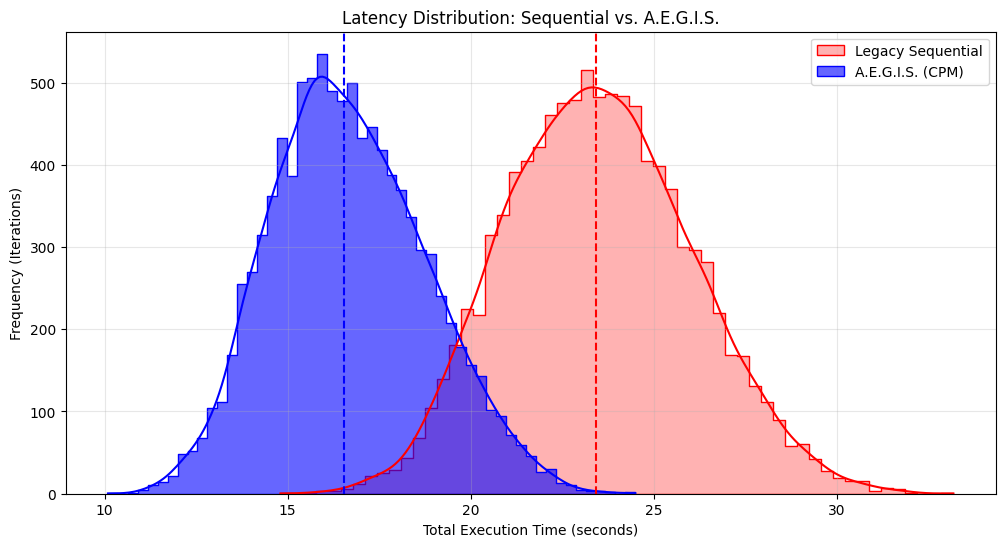

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(results_seq, color="red", label="Legacy Sequential", kde=True, element="step", alpha=0.3)
sns.histplot(results_cpm, color="blue", label="A.E.G.I.S. (CPM)", kde=True, element="step", alpha=0.6)

plt.axvline(statistics.median(results_seq), color='red', linestyle='--')
plt.axvline(statistics.median(results_cpm), color='blue', linestyle='--')

plt.title("Latency Distribution: Sequential vs. A.E.G.I.S.")
plt.xlabel("Total Execution Time (seconds)")
plt.ylabel("Frequency (Iterations)")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()